## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import geopandas as gpd

%matplotlib inline

In [2]:
from src.util import preprocess, df_to_gdf, add_region, encode_region, preprocess_for_tsfresh, drop_unused_cols, get_label_encoder

In [3]:
DATA_DIR = "data/"

In [4]:
regions = gpd.read_file(DATA_DIR + "boundaries/admin_level_4.shp", encoding='cp1251')

In [20]:
regions.head()

,name,name_ru,boundary,admin_leve,ref,int_ref,name_ca,name_de,name_en,name_es,...,alt_name_n,name_sq,name_su,name_ug,name_tyv,official14,name_aba,name_nog,alt_name_s,geometry
0,Сумска,Сумска,administrative,4,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((35.39847 50.90907, 35.39812 50.90910..."
1,Камчатский край,Камчатский край,administrative,4,RU-KAM,RU-KAM,Territori de Kamtxatka,Region Kamtschatka,Kamchatka Krai,Krai de Kamchatka,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((168.44560 54.51135, 168.44581 ..."
2,Мурманская область,Мурманская область,administrative,4,RU-MUR,RU-MUR,Provincia de Murmansk,Oblast Murmansk,Murmansk Oblast,Oblast de Murmansk,...,None,None,None,None,None,None,None,None,None,"POLYGON ((42.50570 66.99024, 42.31571 66.86190..."
3,Пермский край,Пермский край,administrative,4,RU-PER,RU-PER,Territori de Perm,Region Perm,Perm Krai,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((59.48273 60.82788, 59.47942 60.82226..."
4,Свердловская область,Свердловская область,administrative,4,RU-SVE,RU-SVE,Provincia de Sverdlovsk,Oblast Swerdlowsk,Sverdlovsk Oblast,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((66.18486 58.01097, 66.18442 58.01063..."


In [5]:
regions = regions[["name_en", "geometry"]]

In [13]:
regions.head()

,name_ru,geometry
0,None,"POLYGON ((37.26829 55.96781, 37.26755 55.96759..."
1,Гагаринский район,"POLYGON ((33.52692 44.54992, 33.52650 44.54590..."
2,Агинский Бурятский округ,"POLYGON ((115.94210 51.27133, 115.94030 51.271..."
3,Ленинский район,"POLYGON ((33.56570 44.55641, 33.56847 44.55591..."
4,Восточный административный округ,"MULTIPOLYGON (((37.87567 55.82534, 37.87600 55..."


In [6]:
train_df = df_to_gdf(pd.read_csv(DATA_DIR + "train_dataset_train.csv"))
test_df = df_to_gdf(pd.read_csv(DATA_DIR + "test_dataset_test.csv"))

In [7]:
add_region(train_df, regions)
add_region(test_df, regions)

In [378]:
train_df["region"].value_counts()

Voronezh Oblast           1256
Tatarstan                  804
Bryansk Oblast             726
Bashkortostan              687
Nizhny Novgorod Oblast     318
Tula Oblast                317
Oryol Oblast               255
Ryazan Oblast              165
Lipetsk Oblast             152
Sverdlovsk Oblast          113
Perm Krai                   40
Moscow Oblast               29
Kaluga Oblast               25
Chelyabinsk Oblast          11
Name: region, dtype: int64

In [379]:
test_df["region"].value_counts()

Voronezh Oblast           520
Tatarstan                 365
Bryansk Oblast            326
Bashkortostan             304
Nizhny Novgorod Oblast    135
Tula Oblast               135
Oryol Oblast              118
Ryazan Oblast              69
Lipetsk Oblast             51
Sverdlovsk Oblast          37
Moscow Oblast              19
Perm Krai                  11
Kaluga Oblast               6
Chelyabinsk Oblast          4
Name: region, dtype: int64

In [8]:
encode_region(train_df)
encode_region(test_df)

In [ ]:
def add_centroid_coordinates(df: gpd.GeoDataFrame):
    df["center_x"] = df.geometry.centroid.x
    df["center_y"] = df.geometry.centroid.y

In [26]:
add_centroid_coordinates(train_df)
add_centroid_coordinates(test_df)

In [4]:
# skip previous steps
train_df = pd.read_csv(DATA_DIR + "train_with_reg.csv").set_index("id")
test_df = pd.read_csv(DATA_DIR + "test_with_reg.csv").set_index("id")

In [5]:
train_df.head()

,area,crop,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,...,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,geometry,region
id,,,,,,,,,,,,,,,,,,,,,
3536,20,3,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,0.070279,0.077577,...,0.754859,0.392871,0.030883,0.344449,0.658016,0.126832,0.034858,0.614770,"POLYGON ((42.49107269973438 51.41403574496151,...",13
3739,45,4,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,0.024539,0.173578,...,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.177263,0.179612,"POLYGON ((50.25545110440393 56.60539225586957,...",11
1294,28,2,0.006391,0.013679,0.010367,0.007055,0.063929,0.120804,0.112471,0.041751,...,0.384232,0.357296,0.045370,0.172080,0.131344,0.090607,0.072367,0.054127,"POLYGON ((37.99698998166838 53.83590426425984,...",12
2859,19,5,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,0.045054,0.072589,...,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900,POLYGON ((44.721541819433114 55.93533871853271...,6
3685,33,4,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,0.163886,0.109385,...,0.772962,0.426777,0.080592,0.067906,0.055220,0.157676,0.022251,0.012048,"POLYGON ((34.77829934013837 52.9072014835248, ...",1


<AxesSubplot: >

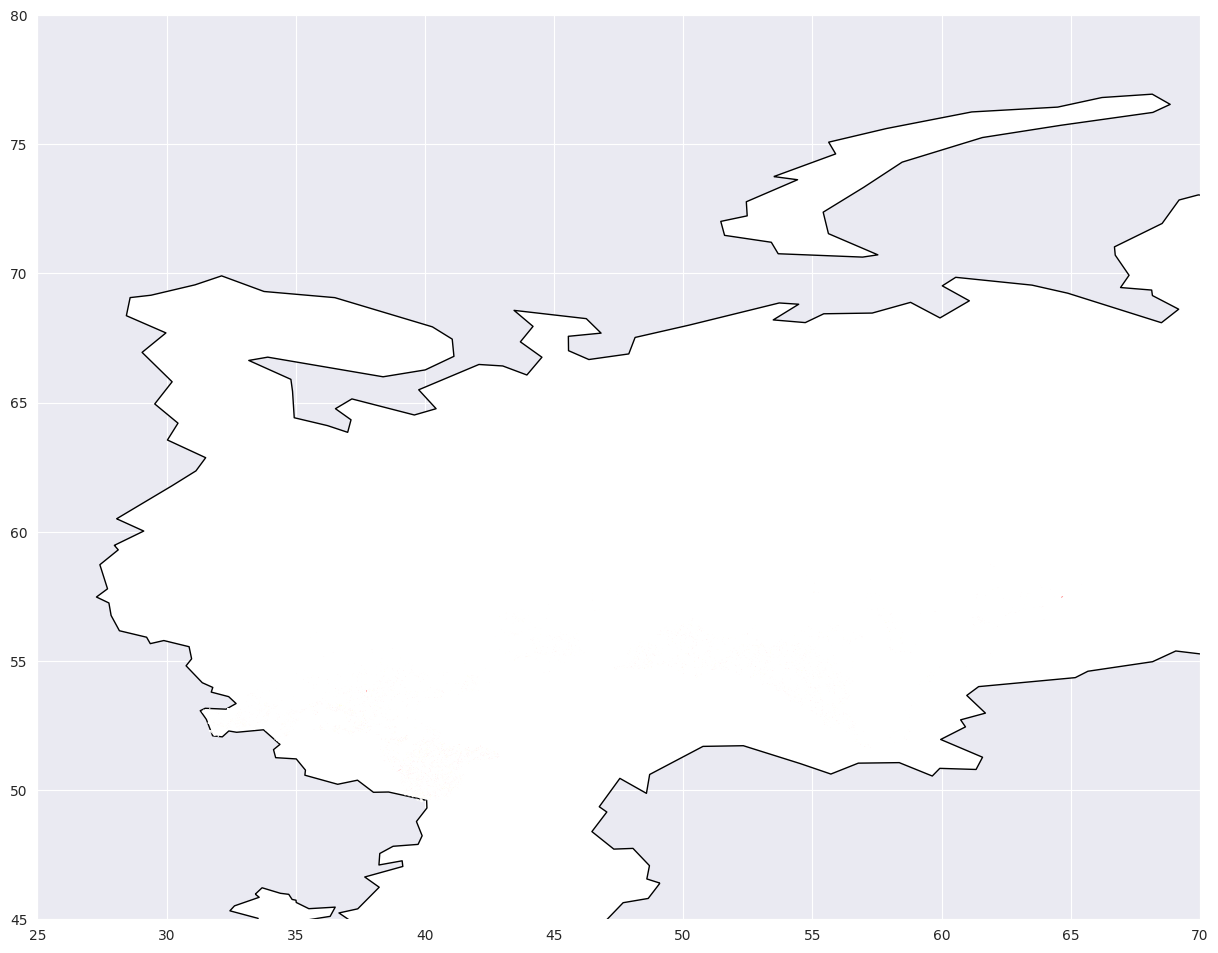

In [383]:
plt.rcParams['figure.figsize'] = (15, 15)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.iso_a3 == 'RUS'].plot(color='white', edgecolor='black')
ax.set_xlim(25, 70)
ax.set_ylim(45, 80)
train_df.plot(ax=ax, color='red')
test_df.plot(ax=ax, color='yellow')

<AxesSubplot: >

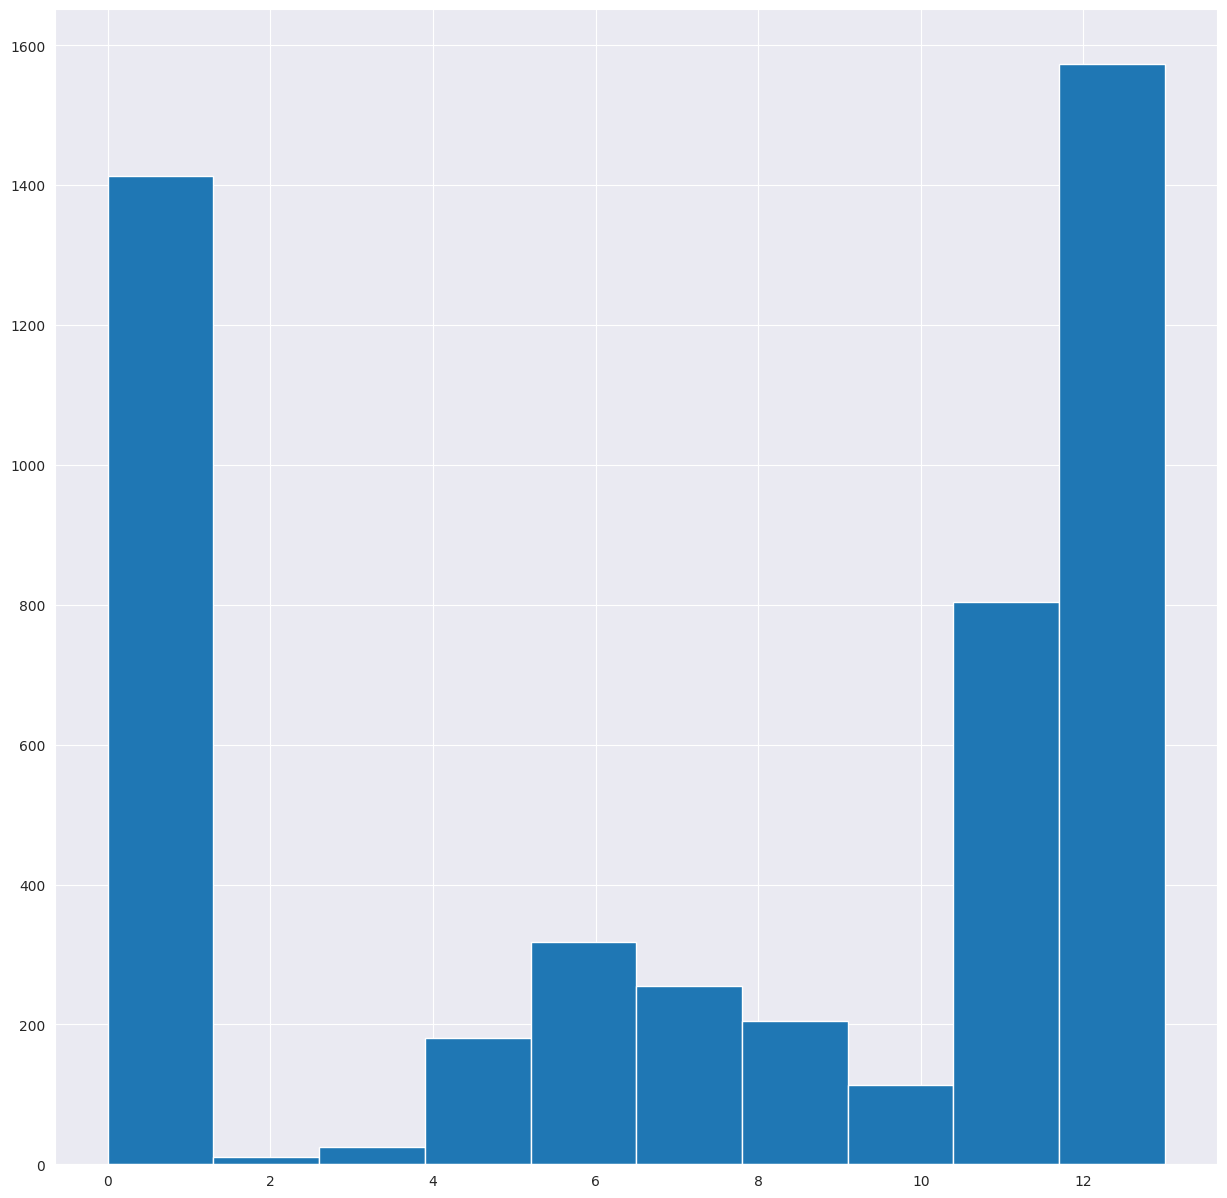

In [384]:
train_df["region"].hist()

<AxesSubplot: >

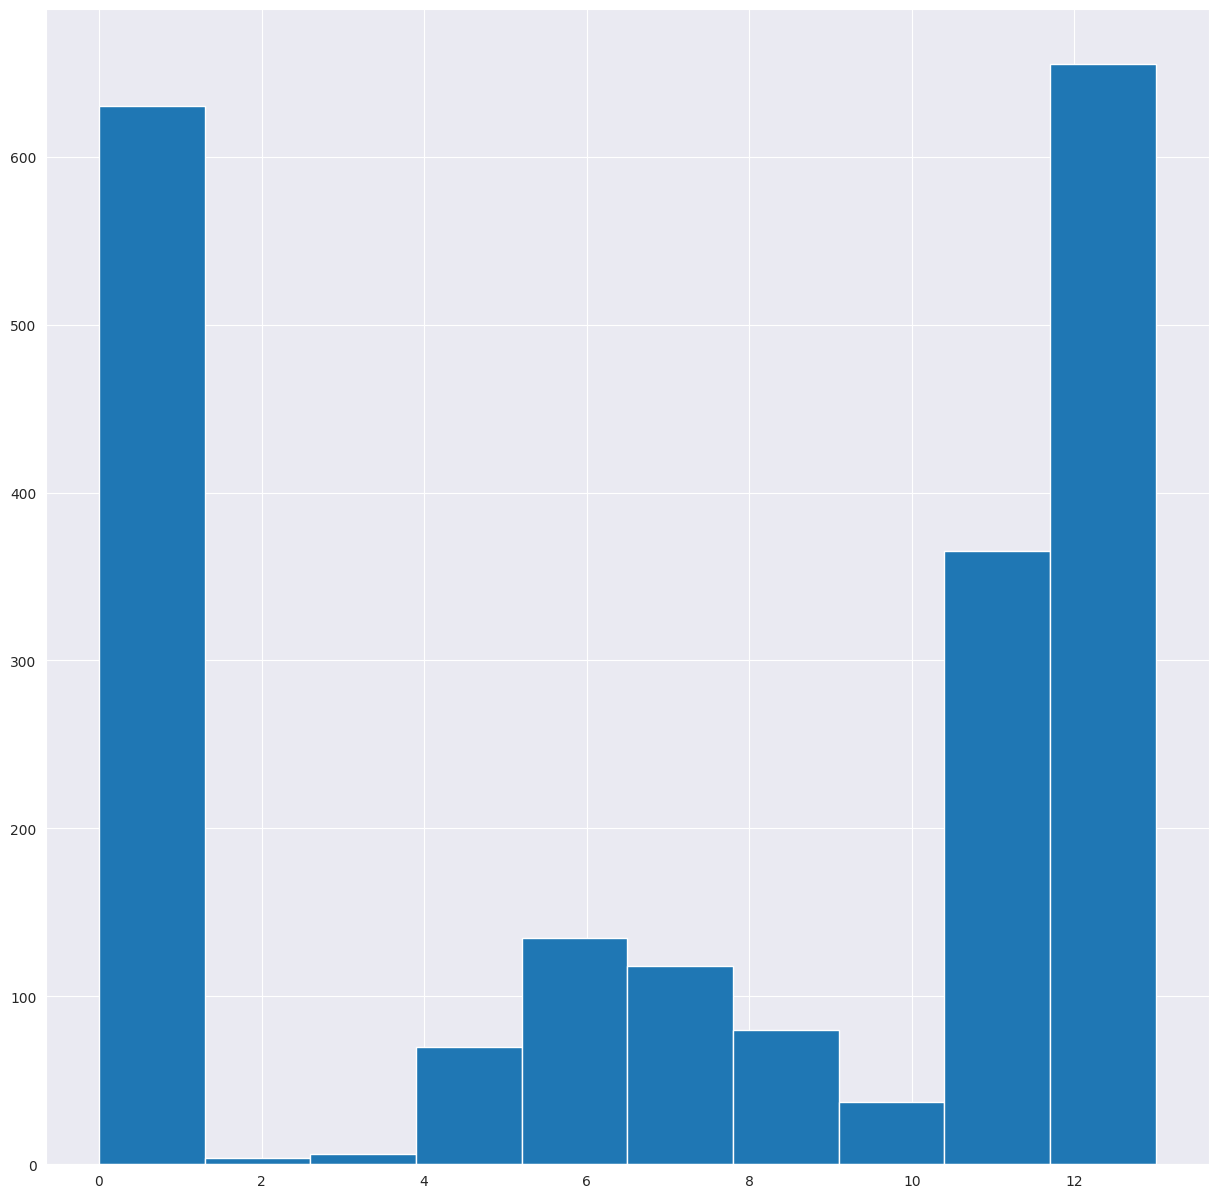

In [385]:
test_df["region"].hist()

Теперь рассмотрим главный столбец с C/Х культурой

<AxesSubplot: >

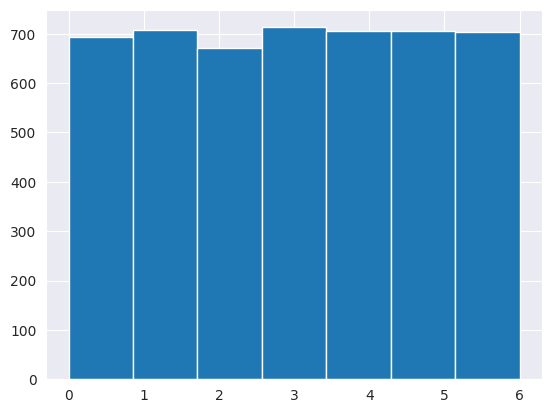

In [98]:
train_df["crop"].hist(bins=7)

Заметен слабый разброс популярности категорий

In [221]:
train_df.region.value_counts()

13    1256
11     804
1      726
0      687
6      318
12     317
7      255
9      165
4      152
10     113
8       40
5       29
3       25
2       11
Name: region, dtype: int64

<AxesSubplot: >

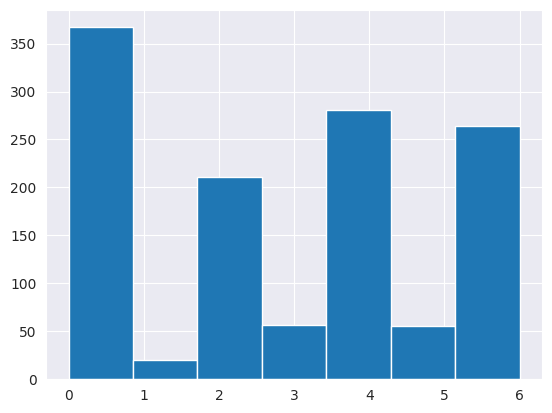

In [222]:
train_df.loc[train_df.region == 13, "crop"].hist(bins=7)

In [526]:
train_df["crop"].value_counts()

3    713
1    707
5    706
4    705
6    703
0    693
2    671
Name: crop, dtype: int64

Посмотрим на разброс площади полей

## Выделим выборки

In [105]:
def merge_mean(df: pd.DataFrame, next_col_iter: callable) -> pd.DataFrame:
    nd_cols = get_ndvi_columns(df)
    tmp = df.drop(columns=nd_cols)

    curr_idx = 0
    curr_col = nd_cols[0]
    next_col = next_col_iter(nd_cols, curr_col)
    while next_col is not None:
        tmp[f"nd_mean_{curr_idx}"] = df.loc[:, curr_col:next_col].mean(axis=1)
        curr_col = next_col
        next_col = next_col_iter(nd_cols, curr_col)
        curr_idx += 1
    return tmp

In [8]:
def half_month(cols: list[str], curr: str):
    next_col = None

    def dm(col):
        return tuple(map(int, col.split("-")[-2:]))[::-1]

    day_curr, month_curr = dm(curr)

    if day_curr >= 15:
        for c in cols:
            if dm(c)[1] > month_curr:
                next_col = c
                break
    else:
        for c in cols:
            d, m = dm(c)
            if d >= 15 and m == month_curr:
                next_col = c
                break

    if next_col is None and cols.index(curr) != len(cols) - 1:
        return cols[-1]

    return next_col

In [54]:
def gen_features(df: pd.DataFrame, next_col_iter: callable) -> pd.DataFrame:
    nd_cols = get_ndvi_columns(df)
    tmp = df.copy()

    curr_idx = 0
    curr_col = nd_cols[0]
    next_col = next_col_iter(nd_cols, curr_col)
    while next_col is not None:
        tmp[f"nd_mean_{curr_idx}"] = df.loc[:, curr_col:next_col].mean(axis=1)
        tmp[f"nd_median_{curr_idx}"] = df.loc[:, curr_col:next_col].median(axis=1)
        tmp[f"nd_std_{curr_idx}"] = df.loc[:, curr_col:next_col].std(axis=1)
        tmp[f"nd_max_{curr_idx}"] = df.loc[:, curr_col:next_col].max(axis=1)
        curr_col = next_col
        next_col = next_col_iter(nd_cols, curr_col)
        curr_idx += 1
    return tmp

In [10]:
from src.util import get_ndvi_columns

In [55]:
# train_df = merge_mean(train_df, half_month)
# test_df = merge_mean(test_df, half_month)
# train_df = gen_features(train_df, half_month)
# test_df = gen_features(test_df, half_month)

In [5]:
from tsfresh import extract_relevant_features

In [6]:
y_tsf, X_tsf = preprocess_for_tsfresh(train_df)

In [7]:
features_filtered_direct = extract_relevant_features(X_tsf, y_tsf,
                                                     column_id='id', column_sort='time', ml_task='classification')
features_filtered_direct.head()

Feature Extraction: 100%|██████████| 40/40 [00:31<00:00,  1.28it/s]


,"ndvi__fft_coefficient__attr_""imag""__coeff_25","ndvi__fft_coefficient__attr_""real""__coeff_12","ndvi__fft_coefficient__attr_""real""__coeff_19","ndvi__fft_coefficient__attr_""real""__coeff_11","ndvi__agg_autocorrelation__f_agg_""mean""__maxlag_40","ndvi__fft_coefficient__attr_""imag""__coeff_22","ndvi__fft_coefficient__attr_""imag""__coeff_8","ndvi__fft_coefficient__attr_""angle""__coeff_8","ndvi__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""mean""","ndvi__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)",...,"ndvi__fft_coefficient__attr_""abs""__coeff_14","ndvi__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4","ndvi__fft_coefficient__attr_""real""__coeff_20",ndvi__mean_n_absolute_max__number_of_maxima_7,"ndvi__augmented_dickey_fuller__attr_""teststat""__autolag_""AIC""","ndvi__augmented_dickey_fuller__attr_""pvalue""__autolag_""AIC""","ndvi__cwt_coefficients__coeff_12__w_5__widths_(2, 5, 10, 20)","ndvi__matrix_profile__feature_""mean""__threshold_0.98","ndvi__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0",ndvi__number_cwt_peaks__n_1
0,-2.289243,-0.908800,-2.709955,1.391227,0.010955,0.624739,0.316521,15.385496,0.819666,-0.066402,...,2.137521,0.011122,0.720688,0.855462,-4.839851,4.560207e-05,-0.161129,2.271422,0.040159,12.0
1,0.815056,2.455512,0.175117,-0.140882,0.007927,-0.213054,-1.589111,-38.666088,0.739236,0.074398,...,2.188311,0.001952,-0.630142,0.777246,-3.927500,1.841530e-03,-0.225365,2.271422,0.031135,15.0
2,-0.714782,2.206130,2.282825,-0.890356,-0.003972,0.483600,-2.223724,-41.636763,0.728150,0.065996,...,0.393554,-0.005345,0.566832,0.822211,-3.796960,2.938575e-03,0.190383,2.271422,0.033515,11.0
3,-0.377327,0.671532,1.353368,-0.958327,0.005933,2.044990,-2.138262,-59.608660,0.749847,0.125809,...,1.600519,-0.023446,1.464803,0.775986,-4.667367,9.686865e-05,0.092878,2.271422,0.035628,11.0
4,-0.163134,-0.423198,-1.245582,-0.082112,0.016202,-1.423420,1.315740,141.845146,0.908746,0.226360,...,2.747893,0.018512,-0.291098,0.653633,-6.190193,6.149485e-08,-0.131554,2.271422,0.030180,13.0


In [14]:
features_filtered_direct = features_filtered_direct.set_index(y_tsf.index)

In [15]:
features_filtered_direct["region"] = train_df["region"]

In [16]:
features_filtered_direct.head()

,"ndvi__fft_coefficient__attr_""imag""__coeff_25","ndvi__fft_coefficient__attr_""real""__coeff_12","ndvi__fft_coefficient__attr_""real""__coeff_19","ndvi__fft_coefficient__attr_""real""__coeff_11","ndvi__agg_autocorrelation__f_agg_""mean""__maxlag_40","ndvi__fft_coefficient__attr_""imag""__coeff_22","ndvi__fft_coefficient__attr_""imag""__coeff_8","ndvi__fft_coefficient__attr_""angle""__coeff_8","ndvi__agg_linear_trend__attr_""rvalue""__chunk_len_10__f_agg_""mean""","ndvi__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)",...,"ndvi__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4","ndvi__fft_coefficient__attr_""real""__coeff_20",ndvi__mean_n_absolute_max__number_of_maxima_7,"ndvi__augmented_dickey_fuller__attr_""teststat""__autolag_""AIC""","ndvi__augmented_dickey_fuller__attr_""pvalue""__autolag_""AIC""","ndvi__cwt_coefficients__coeff_12__w_5__widths_(2, 5, 10, 20)","ndvi__matrix_profile__feature_""mean""__threshold_0.98","ndvi__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0",ndvi__number_cwt_peaks__n_1,region
id,,,,,,,,,,,,,,,,,,,,,
3536,-2.289243,-0.908800,-2.709955,1.391227,0.010955,0.624739,0.316521,15.385496,0.819666,-0.066402,...,0.011122,0.720688,0.855462,-4.839851,4.560207e-05,-0.161129,2.271422,0.040159,12.0,13
3739,0.815056,2.455512,0.175117,-0.140882,0.007927,-0.213054,-1.589111,-38.666088,0.739236,0.074398,...,0.001952,-0.630142,0.777246,-3.927500,1.841530e-03,-0.225365,2.271422,0.031135,15.0,11
1294,-0.714782,2.206130,2.282825,-0.890356,-0.003972,0.483600,-2.223724,-41.636763,0.728150,0.065996,...,-0.005345,0.566832,0.822211,-3.796960,2.938575e-03,0.190383,2.271422,0.033515,11.0,12
2859,-0.377327,0.671532,1.353368,-0.958327,0.005933,2.044990,-2.138262,-59.608660,0.749847,0.125809,...,-0.023446,1.464803,0.775986,-4.667367,9.686865e-05,0.092878,2.271422,0.035628,11.0,6
3685,-0.163134,-0.423198,-1.245582,-0.082112,0.016202,-1.423420,1.315740,141.845146,0.908746,0.226360,...,0.018512,-0.291098,0.653633,-6.190193,6.149485e-08,-0.131554,2.271422,0.030180,13.0,1


In [11]:
X = drop_unused_cols(train_df).drop(["crop"], axis=1).set_index("id")
y = train_df.crop.ravel()

In [12]:
X.head()

,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,nd_mean_2021-05-17,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,region
id,,,,,,,,,,,,,,,,,,,,,
3536,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,0.484102,0.201013,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,13
3739,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,0.519456,0.501486,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,11
1294,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,0.000000,0.561541,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,12
2859,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,0.043604,0.510271,0.511552,...,0.000000,0.642226,0.132886,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523,6
3685,0.130885,0.063492,0.024416,0.000000,0.150671,0.046717,0.254284,0.101479,0.000000,0.403379,...,0.206158,0.099058,0.152003,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539,1


## Обучение модели

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(features_filtered_direct[features_filtered], y_tsf, test_size=0.3, random_state=42)

<AxesSubplot: >

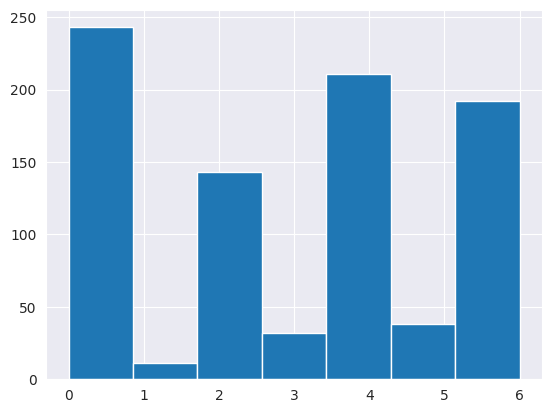

In [224]:
tmp = X_train.copy()
tmp["crop"] = y_train
tmp.loc[tmp.region == 13, "crop"].hist(bins=7)

In [15]:
X_submission = drop_unused_cols(test_df).set_index("id")

In [45]:
X_test = X_test.drop(["center_x", "center_y"], axis=1)
X_train = X_train.drop(["center_x", "center_y"], axis=1)
X_submission = X_submission.drop(["center_x", "center_y"], axis=1)

KeyError: "['center_x', 'center_y'] not found in axis"

In [20]:
X_test.head()

,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,nd_mean_2021-05-17,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,region
id,,,,,,,,,,,,,,,,,,,,,
211,0.026748,0.000000,0.378888,0.121715,0.157712,0.213501,0.232733,0.034289,0.668701,0.579573,...,0.000000,0.082335,0.178854,0.074535,0.216963,0.061397,0.164855,0.096133,0.152620,1
4914,0.016803,0.066484,0.000000,0.046622,0.021360,0.198412,0.081016,0.000000,0.000000,0.107726,...,0.141730,0.641444,0.045635,0.029770,0.119956,0.422689,0.173916,0.025866,0.052045,7
6489,0.009590,0.294204,0.154145,0.000000,0.024242,0.009527,0.010637,0.000000,0.398782,0.072743,...,0.498228,0.684829,0.654182,0.151986,0.120972,0.641316,0.427979,0.146368,0.023762,0
2026,0.077293,0.122274,0.324855,0.066166,0.176182,0.035825,0.000000,0.182447,0.366045,0.436877,...,0.058447,0.048950,0.135116,0.149014,0.110133,0.177042,0.010397,0.075833,0.047048,1
5122,0.153050,0.160796,0.616647,0.214850,0.170758,0.024940,0.147228,0.000000,0.447088,0.060095,...,0.016812,0.140802,0.169656,0.061667,0.040016,0.000000,0.146637,0.176727,0.000000,1


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
all_preds = X_test.copy()
all_preds["crop"] = 0

submission_preds = X_submission.copy()
submission_preds["crop"] = 0

for i, reg in enumerate(get_label_encoder().classes_):
    print(reg)
    clf = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=20)
    flt = X_train.region == i
    # clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=min(len(X_train[flt]), 15))
    clf.fit(X_train[flt].drop(["region"], axis=1), y_train[X_train.region == i])
    print('Samples:', len(X_train[flt]))
    pred = clf.predict(X_train[flt].drop(["region"], axis=1))
    print('Train:', recall_score(y_train[flt], pred, average="macro", zero_division=0) * 100)
    flt = X_test.region == i
    pred = clf.predict(X_test[flt].drop(["region"], axis=1))
    all_preds.loc[all_preds.region == i, "crop"] = pred
    print('Test:', recall_score(y_test[flt], pred, average="macro", zero_division=0) * 100)

    flt = X_submission.region == i
    pred = clf.predict(X_submission[flt].drop(["region"], axis=1))
    submission_preds.loc[flt, "crop"] = pred
    print()

print('Test total:',
      recall_score(y_test, all_preds["crop"].ravel(), average="macro", zero_division=0) * 100)
submission_df = submission_preds[["crop"]]

Bashkortostan
Samples: 484
Train: 100.0
Test: 96.75324675324676

Bryansk Oblast
Samples: 497
Train: 100.0
Test: 83.14984709480122

Chelyabinsk Oblast
Samples: 10
Train: 100.0
Test: 100.0

Kaluga Oblast
Samples: 16
Train: 100.0
Test: 25.0

Lipetsk Oblast
Samples: 103
Train: 100.0
Test: 46.53061224489796

Moscow Oblast
Samples: 23
Train: 100.0
Test: 50.0

Nizhny Novgorod Oblast
Samples: 216
Train: 100.0
Test: 62.14285714285713

Oryol Oblast
Samples: 169
Train: 100.0
Test: 70.0

Perm Krai
Samples: 29
Train: 100.0
Test: 100.0

Ryazan Oblast
Samples: 108
Train: 100.0
Test: 70.83333333333334

Sverdlovsk Oblast
Samples: 74
Train: 100.0
Test: 100.0

Tatarstan
Samples: 527
Train: 100.0
Test: 99.22268907563024

Tula Oblast
Samples: 226
Train: 100.0
Test: 69.38775510204083

Voronezh Oblast
Samples: 899
Train: 100.0
Test: 91.59652757394319

Test total: 94.50445674976385


In [17]:
submission_df

,crop
id,
3961,3
811,2
2471,3
3950,5
414,4
...,...
5201,2
5465,1
6640,3


In [212]:
train_df[train_df.crop == 2].head()

,area,crop,geometry,region,nd_mean_0,nd_mean_1,nd_mean_2,nd_mean_3,nd_mean_4,nd_mean_5,nd_mean_6,nd_mean_7,nd_mean_8
id,,,,,,,,,,,,,
6534,79,2,POLYGON ((41.496144722491884 54.89599918100276...,9,0.274798,0.250868,0.433575,0.276029,0.677953,0.441628,0.358633,0.300580,0.290583
2131,23,2,"POLYGON ((42.721915804931 55.94088315525214, 4...",6,0.229063,0.240189,0.314661,0.217040,0.665024,0.403157,0.589219,0.358104,0.269683
3783,126,2,POLYGON ((39.900678261920255 54.12164501540243...,9,0.141356,0.108776,0.476262,0.300737,0.680056,0.493502,0.378631,0.200225,0.067184
4165,26,2,POLYGON ((38.907556167421795 54.25259792369697...,9,0.162825,0.240136,0.307877,0.233634,0.651566,0.512067,0.397858,0.278624,0.413565
4746,42,2,"POLYGON ((36.13408008872133 54.41834702968987,...",3,0.177932,0.250352,0.403234,0.342114,0.665000,0.630352,0.643839,0.339366,0.308334


<AxesSubplot: >

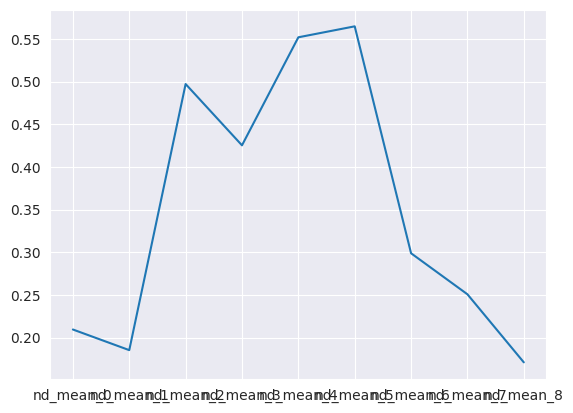

In [211]:
train_df.loc[1743, get_ndvi_columns(train_df)].plot()

<AxesSubplot: >

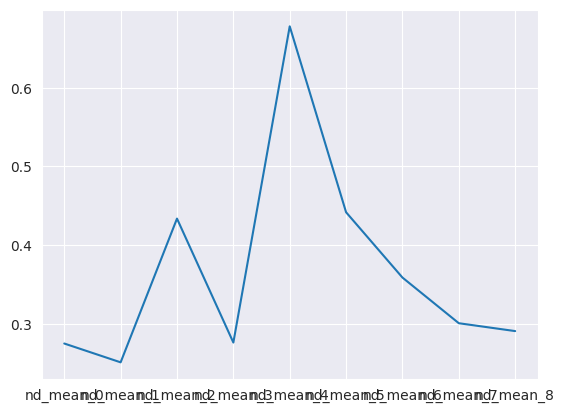

In [213]:
train_df.loc[6534, get_ndvi_columns(train_df)].plot()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf = RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1, criterion="entropy")

# clf = NuSVC(kernel='rbf', random_state=42, decision_function_shape='ovr', nu=0.25, break_ties=True)
# clf = SVC(random_state=42, decision_function_shape='ovr', break_ties=True,
#           **{'C': 10_000, 'kernel': 'rbf'})

## Оценка точности

In [48]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [49]:
pred = clf.predict(X_test)
print(clf, '\n', recall_score(y_test, pred, average="macro", zero_division=0) * 100)

RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=-1,
                       random_state=42) 
 93.55574567156397


In [52]:
clf.feature_importances_.mean()

0.004098360655737705

Text(0.5, 1.0, 'Feature Importance')

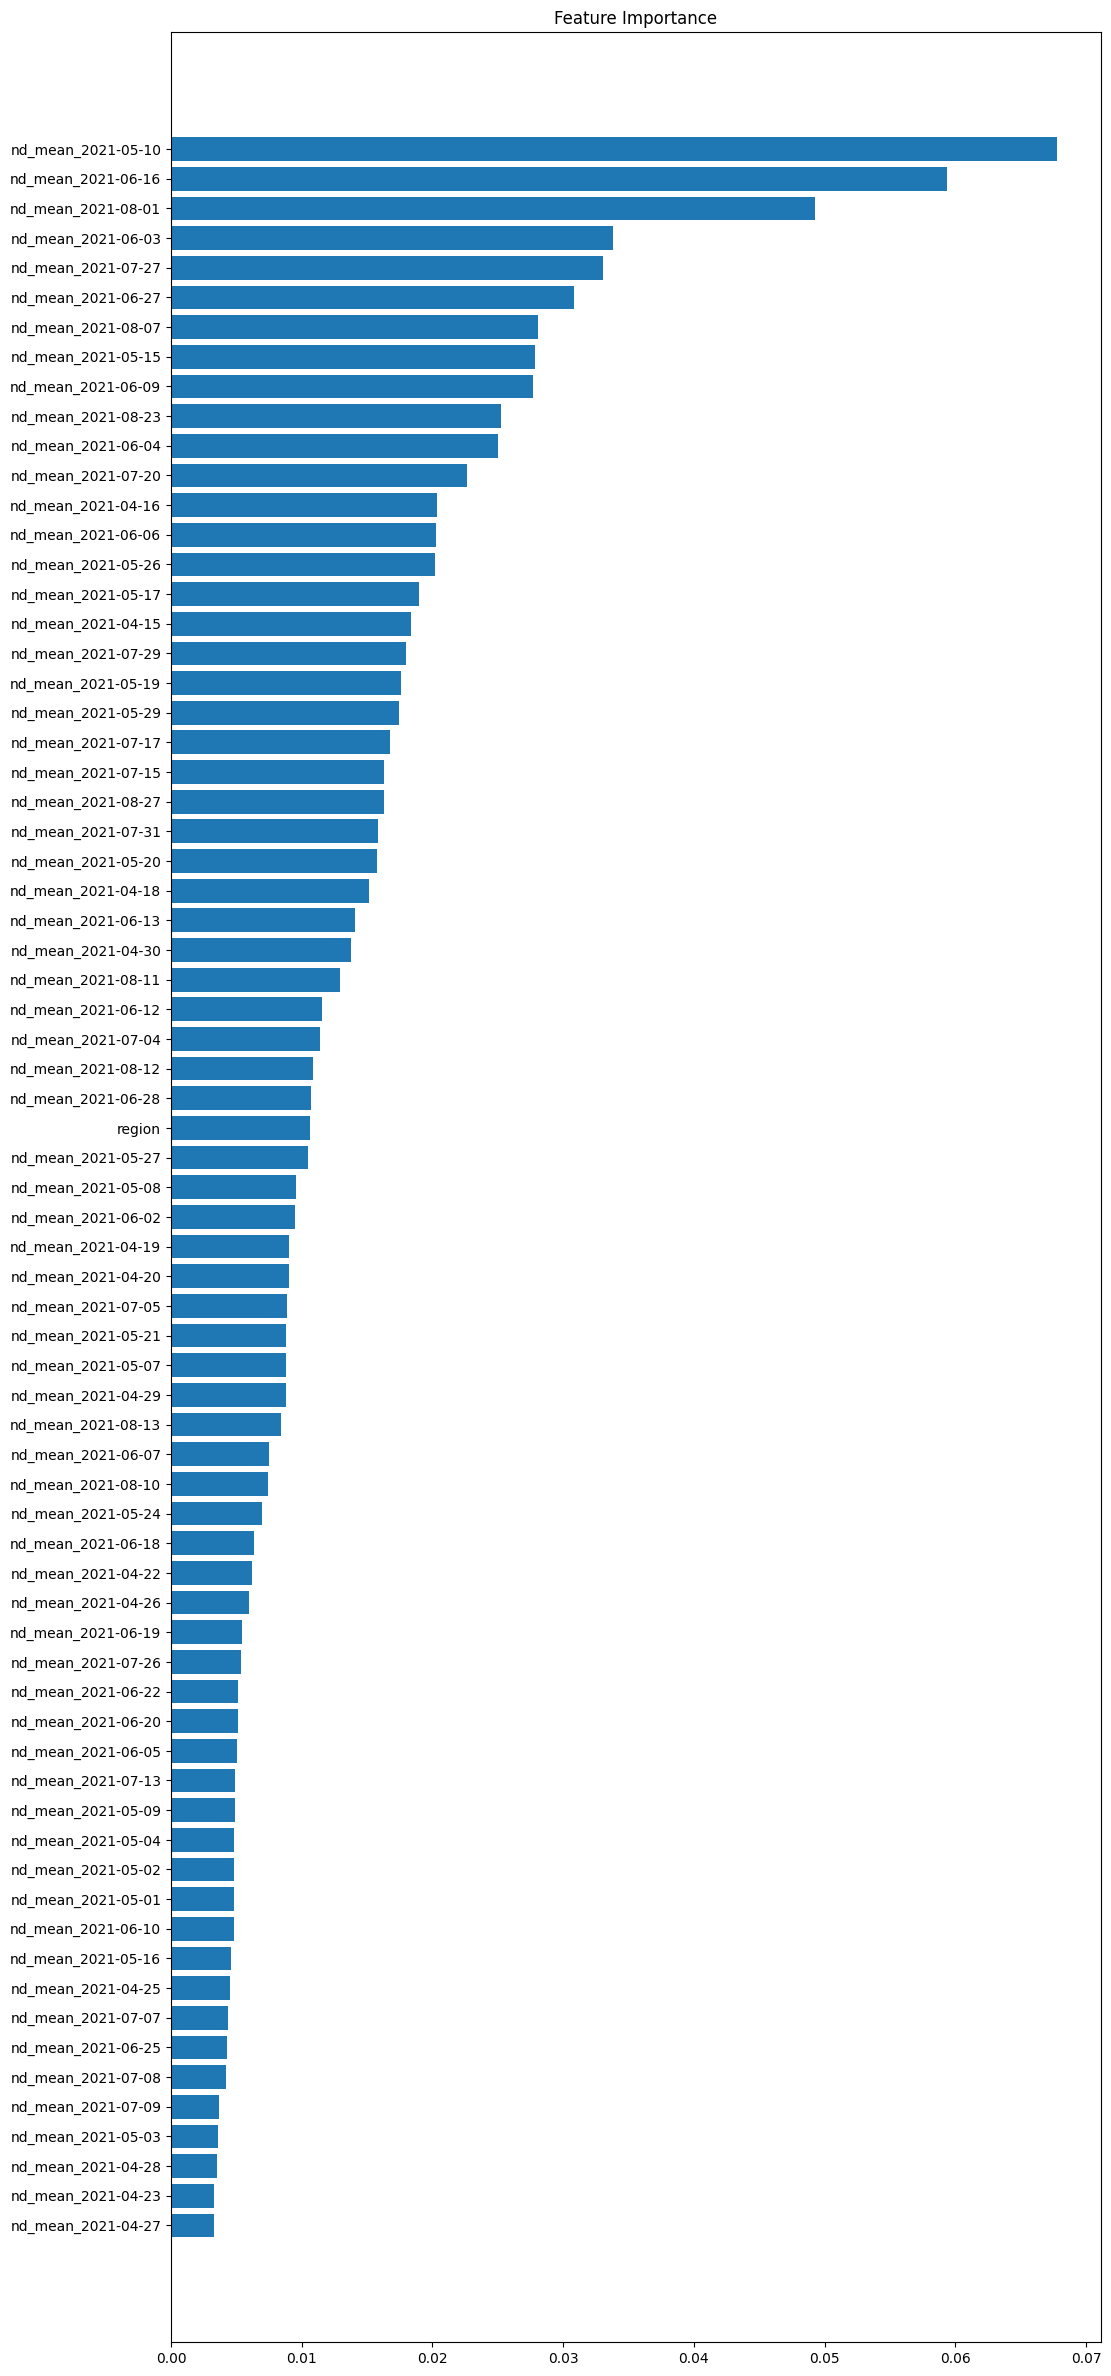

In [50]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 30))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [41]:
importance = pd.DataFrame(clf.feature_importances_, index=features_filtered_direct.columns)

In [45]:
features_filtered = list(importance[importance.loc[:, 0] > importance.loc[:, 0].mean()].index)

In [46]:
features_filtered

['ndvi__fft_coefficient__attr_"imag"__coeff_25',
 'ndvi__fft_coefficient__attr_"real"__coeff_12',
 'ndvi__fft_coefficient__attr_"real"__coeff_19',
 'ndvi__fft_coefficient__attr_"real"__coeff_11',
 'ndvi__fft_coefficient__attr_"imag"__coeff_22',
 'ndvi__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)',
 'ndvi__fft_coefficient__attr_"real"__coeff_15',
 'ndvi__fft_coefficient__attr_"imag"__coeff_13',
 'ndvi__fft_coefficient__attr_"imag"__coeff_19',
 'ndvi__fft_coefficient__attr_"imag"__coeff_17',
 'ndvi__fft_coefficient__attr_"real"__coeff_28',
 'ndvi__fft_coefficient__attr_"imag"__coeff_32',
 'ndvi__fft_coefficient__attr_"imag"__coeff_27',
 'ndvi__fft_coefficient__attr_"real"__coeff_13',
 'ndvi__fft_coefficient__attr_"imag"__coeff_29',
 'ndvi__fft_coefficient__attr_"angle"__coeff_17',
 'ndvi__fft_coefficient__attr_"angle"__coeff_22',
 'ndvi__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)',
 'ndvi__fft_coefficient__attr_"real"__coeff_27',
 'ndvi__fft_coefficient__attr_"angle"

In [74]:
X_submission = drop_unused_cols(test_df)

In [75]:
X_submission.head()

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,nd_mean_2021-04-27,...,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,region
id,,,,,,,,,,,,,,,,,,,,,
3961,3,2,1,1,3,3,3,3,3,1,...,3,2,1,1,2,1,3,3,3,13
811,1,1,1,2,1,3,1,2,3,2,...,3,1,1,2,1,4,3,1,3,1
2471,2,2,2,2,2,2,2,1,1,1,...,2,1,2,2,3,2,2,2,2,0
3950,2,1,1,1,1,1,3,1,2,2,...,2,1,1,1,2,2,2,1,1,13
414,2,2,2,1,2,1,3,2,1,3,...,1,2,3,3,3,3,2,1,1,11


In [30]:
preprocessed = preprocess_for_tsfresh(X_submission, False)[1]

In [23]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

In [31]:
submission_features = extract_features(preprocessed, column_id="id",
                     column_sort="time", impute_function=impute)

Feature Extraction: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]


In [32]:
submission_features = submission_features[features_filtered_direct.columns]

In [76]:
# y_submission = clf.predict(submission_features)
y_submission = clf.predict(X_submission)

In [77]:
y_submission

array([3, 2, 3, ..., 3, 0, 6])

In [78]:
submission_df = test_df.copy()

In [79]:
submission_df["crop"] = y_submission
submission_df = submission_df[["crop"]]
submission_df

,crop
id,
3961,3
811,2
2471,3
3950,5
414,4
...,...
5201,2
5465,1
6640,3


In [28]:
submission_df.to_csv(DATA_DIR + "submission.csv")

<AxesSubplot: >

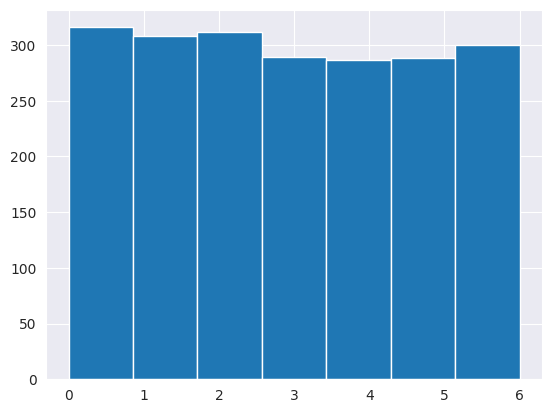

In [60]:
submission_df["crop"].hist(bins=7)

In [29]:
train_df.to_csv(DATA_DIR + "train_with_reg.csv")

In [30]:
test_df.to_csv(DATA_DIR + "test_with_reg.csv")